Class-1 Setosa
Class-2 Versicolor + Virginica_pattern
Misclassified Patterns:  0
Misclassification Error:  0.000 %
Class 1 0
Class 2 0


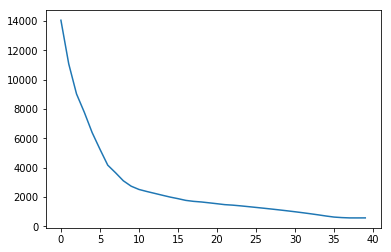

40
Class-1 Setosa
Class-2 Versicolor + Virginica_pattern
Misclassified Patterns:  4
Misclassification Error:  2.667 %
Class 1 2
Class 2 2


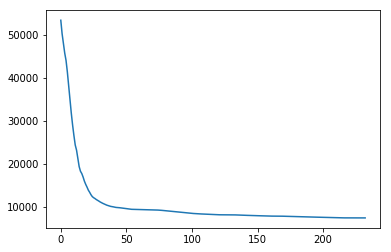

233
Class-1 Setosa
Class-2 Versicolor + Virginica_pattern
Misclassified Patterns:  40
Misclassification Error:  26.667 %
Class 1 26
Class 2 14


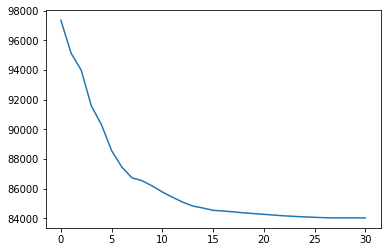

31


In [16]:
import csv
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.00000001
c = 1000


def data_cleansing(data_points, passed_class):
    cleansed_points = []
    for dp in data_points:
        dp[4] = 1
        x = np.array(dp[:5])
        y = x.astype(np.float)
        cleansed_points.append([y, passed_class])
    return cleansed_points


def least_squares(train_set):
    first_part = np.zeros((5, 5))
    for train_data_point in train_set:
        xi = train_data_point[0]
        xi = xi[:, np.newaxis]
        step_mul = np.matmul(xi, xi.transpose())
        first_part = np.add(first_part, step_mul)
    inverse_first_part = np.linalg.inv(first_part)
    second_part = np.zeros((5, 1))
    for train_data_point in train_set:
        xi = train_data_point[0]
        yi = train_data_point[1]
        xi = xi[:, np.newaxis]
        second_part = np.add(second_part, yi * xi)
    weight_matrix = np.matmul(inverse_first_part, second_part)
    return weight_matrix


def svm(class_1_points, class_2_points):
    xi_yi_class_1 = data_cleansing(class_1_points, 1)
    xi_yi_class_2 = data_cleansing(class_2_points, -1)
    training_data = xi_yi_class_1 + xi_yi_class_2
    prev_w_b = least_squares(training_data)
    prev_ui = ui_step(prev_w_b, training_data)
    new_w_b = w_step(prev_ui, training_data)
    new_ui = ui_step(new_w_b, training_data)
    obj_fn_vals = []
    c = 0
    while obj_func_ratio(prev_w_b, new_w_b, training_data, prev_ui, new_ui) < 1:
        prev_w_b = new_w_b
        prev_ui = new_ui
        new_w_b = w_step(new_ui, training_data)
        new_ui = ui_step(new_w_b, training_data)
        obj_fn_vals.append(objective_function_value(new_w_b, training_data, new_ui))
        c +=1
    calc_error(new_w_b, training_data)
    plot_graph(obj_fn_vals)
    print(c)


def ui_step(w_b, xi_yi):
    all_ui = []
    for pattern in xi_yi:
        xi = pattern[0]
        xi = xi[:, np.newaxis]
        yi = pattern[1]
        w_transpose_x = np.matmul(w_b.transpose(), xi)[0][0]
        val = abs(1- (yi * w_transpose_x))
        all_ui.append(max(val, epsilon))
    return all_ui


def w_step(all_ui, xi_yi):
    first_term = np.zeros((5, 5))
    second_term = np.ones((5, 1))
    identity = np.zeros((5, 5))
    identity[:-1, :-1] = np.identity(4)
    for idx, pattern in enumerate(xi_yi):
        xi = pattern[0]
        xi = xi[:, np.newaxis]
        yi = pattern[1]
        ui = all_ui[idx]
        step_mul = np.matmul(xi, xi.transpose())/ui
        first_term = np.add(first_term, step_mul)
        second_term = np.add(second_term, yi * ((1 + ui) / ui) * xi)
    first_term = np.add(identity, (c/2.0) * first_term)
    inverse_first_term = np.linalg.inv(first_term)
    second_term = (c/2) * second_term
    weight_matrix = np.matmul(inverse_first_term, second_term)
    return weight_matrix


def obj_func_ratio(prev_w_b, new_w_b, xi_yi, prev_ui, new_ui):
    prev_obj_val = objective_function_value(prev_w_b, xi_yi, prev_ui)
    new_obj_val = objective_function_value(new_w_b, xi_yi, new_ui)
    ratio = new_obj_val/prev_obj_val
    return ratio


def calc_error(w_b, xi_yi):
    error = 0
    c1_error = 0
    c2_error = 0
    for pattern in xi_yi:
        xi = pattern[0]
        xi = xi[:, np.newaxis]
        yi = pattern[1]
        if (yi*np.matmul(w_b.transpose(), xi))[0][0] < 0:
            error += 1
            if yi == 1:
                c1_error += 1
            else:
                c2_error += 1
    print("Misclassified Patterns: ", error)
    print("Misclassification Error: ", '%.3f'%((error/150.0)*100), "%")
    print("Class 1", c1_error)

    print("Class 2", c2_error)


def objective_function_value(w_b, xi_yi, all_ui):
    p_ans = 0
    for idx, pattern in enumerate(xi_yi):
        xi = pattern[0]
        xi = xi[:, np.newaxis]
        yi = pattern[1]
        ui = all_ui[idx]
        s1 = 1 - (yi * np.matmul(w_b.transpose(), xi)) + ui
        p_ans += (s1 * s1) / (4 * ui)
    norm = np.linalg.norm(w_b[:4])
    ans = ((norm * norm) / 2.0) + (c * p_ans)
    return ans[0][0]


def plot_graph(graph_val):
    plt.plot(range(len(graph_val)), graph_val)
    plt.show()

with open('iris.csv', 'r') as csvfile:
    data_patterns = list(csv.reader(csvfile, delimiter=','))[1:]
    setosa_pattern = data_patterns[:50]
    versicolor_pattern = data_patterns[50:100]
    virginica_pattern = data_patterns[100:150]
    print("Class-1 Setosa")
    print("Class-2 Versicolor + Virginica_pattern")
    svm(setosa_pattern, versicolor_pattern+virginica_pattern)
    print("Class-1 Setosa")
    print("Class-2 Versicolor + Virginica_pattern")
    svm(virginica_pattern, setosa_pattern + versicolor_pattern)
    print("Class-1 Setosa")
    print("Class-2 Versicolor + Virginica_pattern")
    svm(versicolor_pattern, setosa_pattern + virginica_pattern)